In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

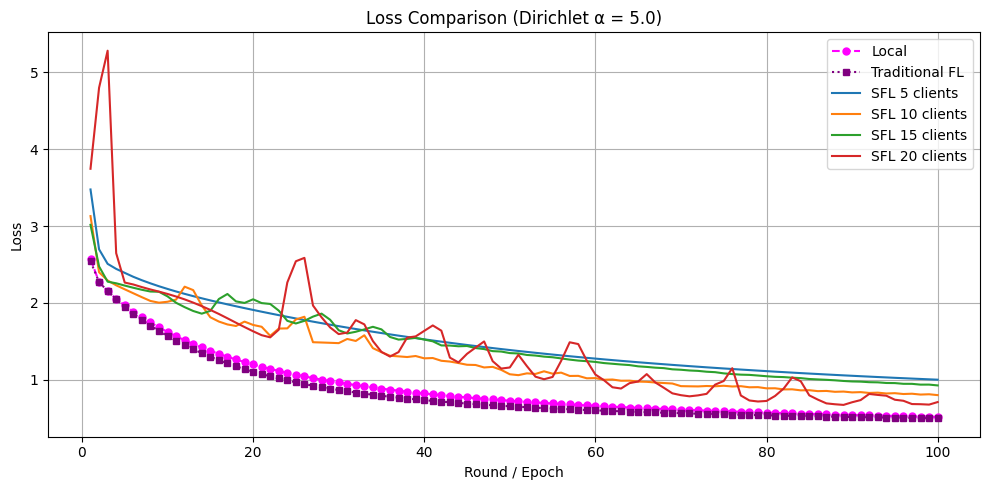

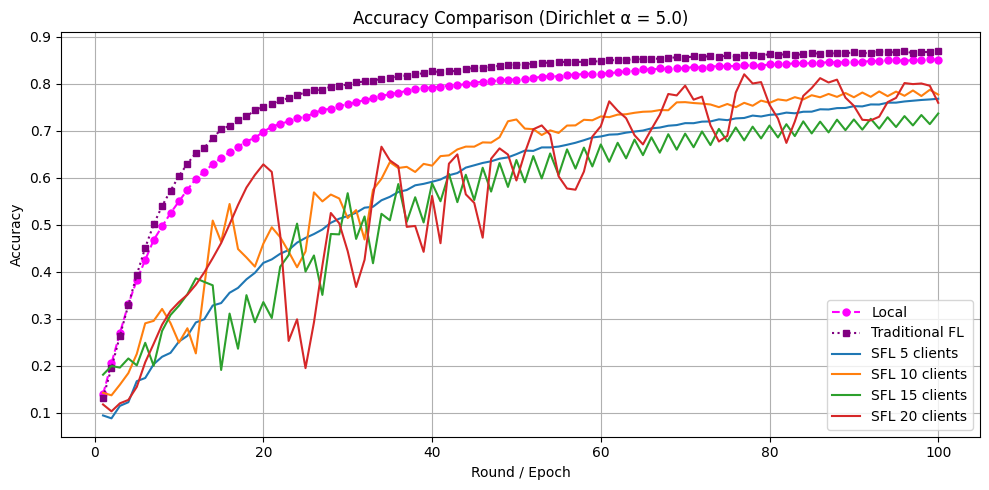

In [2]:
import pandas as pd
import os

# 1. SFL (balance)
folders = ["5clients", "10clients", "15clients", "20clients"]
base_path = "../results/balance"
avg_data = {}

for f in folders:
    df = pd.read_csv(f"{base_path}/{f}/data.csv")
    df_group = df.groupby("global_round")[["loss", "accuracy"]].mean().reset_index()
    avg_data[f] = df_group.rename(columns={
        "loss": f"SFL_{f}_loss",
        "accuracy": f"SFL_{f}_accuracy",
        "global_round": "round"
    })

# Merge SFL data
merged_df = avg_data["5clients"]
for f in ["10clients", "15clients", "20clients"]:
    merged_df = pd.merge(merged_df, avg_data[f], on="round", how="outer")

# 2. Local
folder = "../results/locals"
dfs = []
for f in os.listdir(folder):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, f))
        dfs.append(df)
all_df = pd.concat(dfs)
local_avg = all_df.groupby("epoch")[["loss", "accuracy"]].mean().reset_index()
local_avg = local_avg.rename(columns={
    "epoch": "round",
    "loss": "local_loss",
    "accuracy": "local_accuracy"
})
merged_df = pd.merge(merged_df, local_avg, on="round", how="outer")

# 3. Fed Learning
fed_file = "../results/result.csv"
fed_avg = pd.read_csv(fed_file).groupby("round")[["loss", "accuracy"]].mean().reset_index()
fed_avg = fed_avg.rename(columns={"loss": "fed_loss", "accuracy": "fed_accuracy"})
merged_df = pd.merge(merged_df, fed_avg, on="round", how="outer")

# Xác định trục x
x = merged_df["round"]

# Vẽ Loss với alpha trong title
plt.figure(figsize=(10, 5))
plt.plot(x, merged_df["local_loss"], label="Local", linestyle="--", marker="o", color="magenta", markersize=5)
plt.plot(x, merged_df["fed_loss"], label="Traditional FL", linestyle=":", marker="s", color="purple", markersize=5)
plt.plot(x, merged_df["SFL_5clients_loss"], label="SFL 5 clients", color="tab:blue")
plt.plot(x, merged_df["SFL_10clients_loss"], label="SFL 10 clients", color="tab:orange")
plt.plot(x, merged_df["SFL_15clients_loss"], label="SFL 15 clients", color="tab:green")
plt.plot(x, merged_df["SFL_20clients_loss"], label="SFL 20 clients", color="tab:red")
plt.xlabel("Round / Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison (Dirichlet α = 5.0)")  # Alpha ghi trực tiếp trong title
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ Accuracy với alpha trong title
plt.figure(figsize=(10, 5))
plt.plot(x, merged_df["local_accuracy"], label="Local", linestyle="--", marker="o", color="magenta", markersize=5)
plt.plot(x, merged_df["fed_accuracy"], label="Traditional FL", linestyle=":", marker="s", color="purple", markersize=5)
plt.plot(x, merged_df["SFL_5clients_accuracy"], label="SFL 5 clients", color="tab:blue")
plt.plot(x, merged_df["SFL_10clients_accuracy"], label="SFL 10 clients", color="tab:orange")
plt.plot(x, merged_df["SFL_15clients_accuracy"], label="SFL 15 clients", color="tab:green")
plt.plot(x, merged_df["SFL_20clients_accuracy"], label="SFL 20 clients", color="tab:red")
plt.xlabel("Round / Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison (Dirichlet α = 5.0)")  # Alpha ghi trực tiếp trong title
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

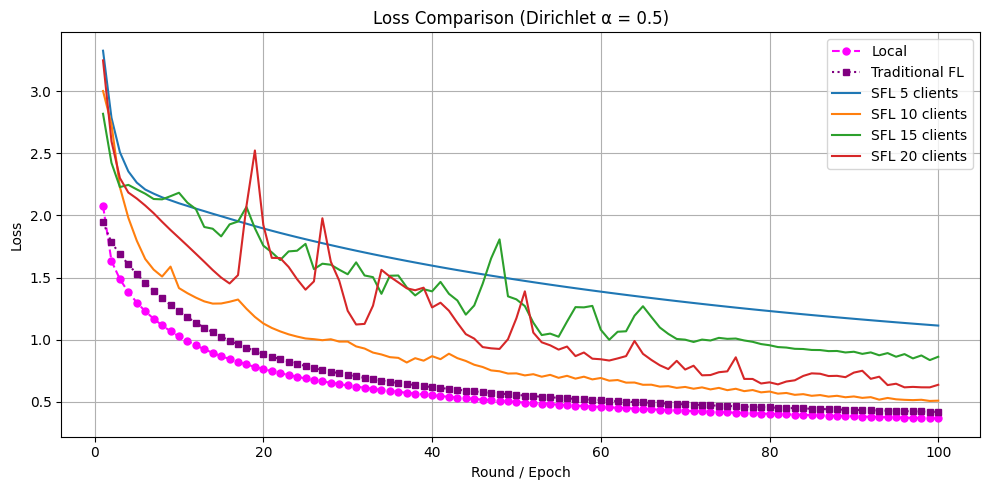

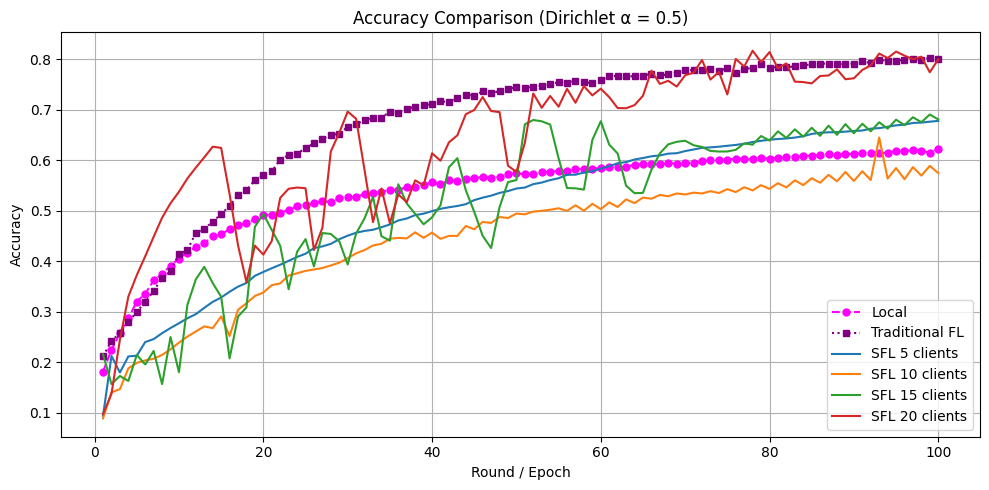

In [3]:
# 1. SFL (balance)
folders = ["5clients", "10clients", "15clients", "20clients"]
base_path = "../results/imbalance"
avg_data = {}

for f in folders:
    df = pd.read_csv(f"{base_path}/{f}/data.csv")
    df_group = df.groupby("global_round")[["loss", "accuracy"]].mean().reset_index()
    avg_data[f] = df_group.rename(columns={
        "loss": f"SFL_{f}_loss",
        "accuracy": f"SFL_{f}_accuracy",
        "global_round": "round"
    })

# Merge SFL data
merged_df = avg_data["5clients"]
for f in ["10clients", "15clients", "20clients"]:
    merged_df = pd.merge(merged_df, avg_data[f], on="round", how="outer")

# 2. Local
folder = "../results/locals_imbalance"
dfs = []
for f in os.listdir(folder):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, f))
        dfs.append(df)
all_df = pd.concat(dfs)
local_avg = all_df.groupby("epoch")[["loss", "accuracy"]].mean().reset_index()
local_avg = local_avg.rename(columns={
    "epoch": "round",
    "loss": "local_loss",
    "accuracy": "local_accuracy"
})
merged_df = pd.merge(merged_df, local_avg, on="round", how="outer")

# 3. Fed Learning
fed_file = "../results/result_imbalance.csv"
fed_avg = pd.read_csv(fed_file).groupby("round")[["loss", "accuracy"]].mean().reset_index()
fed_avg = fed_avg.rename(columns={"loss": "fed_loss", "accuracy": "fed_accuracy"})
merged_df = pd.merge(merged_df, fed_avg, on="round", how="outer")

# Xác định trục x
x = merged_df["round"]

# Vẽ Loss
plt.figure(figsize=(10, 5))
plt.plot(x, merged_df["local_loss"], label="Local", linestyle="--", marker="o", color="magenta", markersize=5)
plt.plot(x, merged_df["fed_loss"], label="Traditional FL", linestyle=":", marker="s", color="purple", markersize=5)
plt.plot(x, merged_df["SFL_5clients_loss"], label="SFL 5 clients", color="tab:blue")
plt.plot(x, merged_df["SFL_10clients_loss"], label="SFL 10 clients", color="tab:orange")
plt.plot(x, merged_df["SFL_15clients_loss"], label="SFL 15 clients", color="tab:green")
plt.plot(x, merged_df["SFL_20clients_loss"], label="SFL 20 clients", color="tab:red")
plt.xlabel("Round / Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison (Dirichlet α = 0.5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ Accuracy
plt.figure(figsize=(10, 5))
plt.plot(x, merged_df["local_accuracy"], label="Local", linestyle="--", marker="o", color="magenta", markersize=5)
plt.plot(x, merged_df["fed_accuracy"], label="Traditional FL", linestyle=":", marker="s", color="purple", markersize=5)
plt.plot(x, merged_df["SFL_5clients_accuracy"], label="SFL 5 clients", color="tab:blue")
plt.plot(x, merged_df["SFL_10clients_accuracy"], label="SFL 10 clients", color="tab:orange")
plt.plot(x, merged_df["SFL_15clients_accuracy"], label="SFL 15 clients", color="tab:green")
plt.plot(x, merged_df["SFL_20clients_accuracy"], label="SFL 20 clients", color="tab:red")
plt.xlabel("Round / Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison (Dirichlet α = 0.5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
